# Setup

## Imports and fixed paths

In [1]:
# Imports

import os
import sys
import math
import random
import numpy as np
from netCDF4 import Dataset
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import xarray as xr
import pandas as pd
from importlib import reload 

In [2]:
#Paths

# Getting the path of the notebook (NOTE: not totally safe)
localdir = os.getcwd()

# Adding the code directory to the path (one directory up from notebook directory)
codedir = os.path.dirname(localdir)

sys.path.append(codedir)
from backtrack_loc import backtrack_loc
from plot_trajectories import plot_traj
from bt_validation import *

## User-defined parameters

In [3]:
# Trajectory parameters
json_file = 'sudarco_cruises.json'
json_data_2022mo = 'AO2022_moorings'
json_data_2022st = 'AO2022_ice_stations'
json_data_2023st = 'AO2023_ice_stations'
period = '5y'

# Defining and creating an output directory
outdir = os.path.join(localdir, 'output')
if not os.path.isdir(outdir):
    os.makedirs(outdir)

## Plotting parameters

Here, the paths of the known good output (KGO) comparison files are defined.

In [4]:
# Plotting parameters

kgo_2022mo = os.path.join(codedir, 'test_data', 'backtrack_loc_AO2022_moorings_2d_20210807-20220807.nc')
kgo_2022st = os.path.join(codedir, 'test_data', 'backtrack_loc_AO2022_ice_stations_1d_20220729.nc')
kgo_2023st = os.path.join(codedir, 'test_data', 'backtrack_loc_AO2023_ice_stations_1d_20230606.nc')

# Backtracking

## Ice Stations

### Trajectories

In [5]:
# 2022
bt_2022st = backtrack_loc(json_file=json_file, json_data=json_data_2022st, period=period, outname=outdir,
                      force=True, verbose=True)

#1 (North Pole): Running backtracking in 1-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_ice_stations_1d_20220729.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Polar_Stereographic_Grid (found in dt0)
Got NetCDF: Attribute not found
Tracking... 29%
GAP WARNING: No ice conc data available for 20210220, using data fo 20210219 instead (skip 1 days)
Tracking... 36%
Output file ready in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_ice_stations_1d_20220729.nc



In [6]:
# 2023
bt_2023st = backtrack_loc(json_file=json_file, json_data=json_data_2023st, period=period, outname=outdir,
              force=True, verbose=True)

IceStation#1: Running backtracking in 1-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2023_ice_stations_1d_20230606.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Polar_Stereographic_Grid (found in dt0)
Got NetCDF: Attribute not found
Tracking... 12%
GAP WARNING: No ice conc data available for 20221109, using data fo 20221108 instead (skip 1 days)
Tracking... 46%
GAP WARNING: No ice conc data available for 20210220, using data fo 20210219 instead (skip 1 days)
Tracking... 52%
Output file ready in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2023_ice_stations_1d_20230606.nc



### Plotting

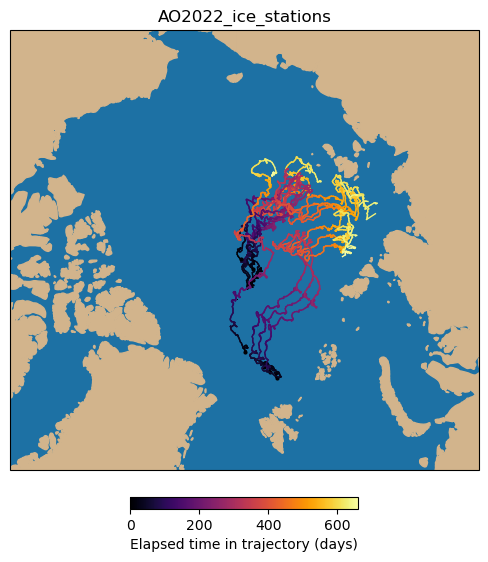

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_ice_stations_1d_20220729_ts.png


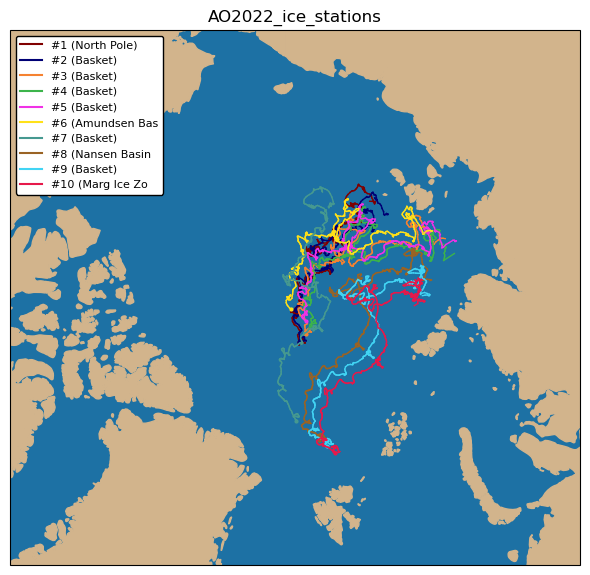

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_ice_stations_1d_20220729_id.png


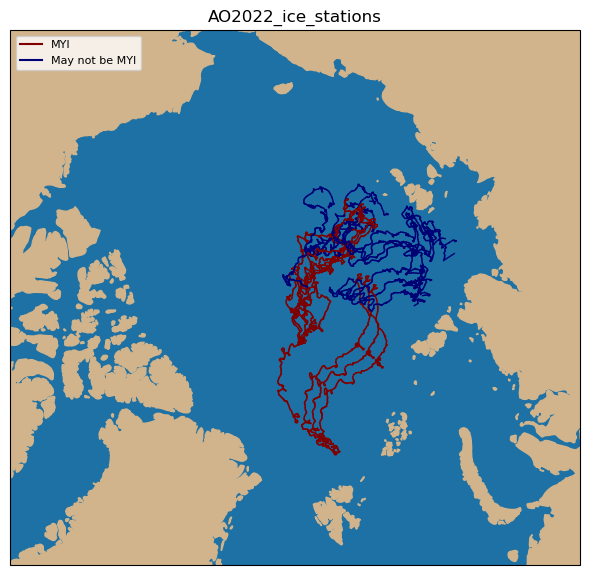

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_ice_stations_1d_20220729_myi.png


In [7]:
# 2022 Ice Stations
plot_traj(bt_2022st, region='ease-nh', colmode='timestep', output=outdir)
plot_traj(bt_2022st, region='ease-nh', colmode='id', output=outdir)
plot_traj(bt_2022st, region='ease-nh', colmode='myi', output=outdir)


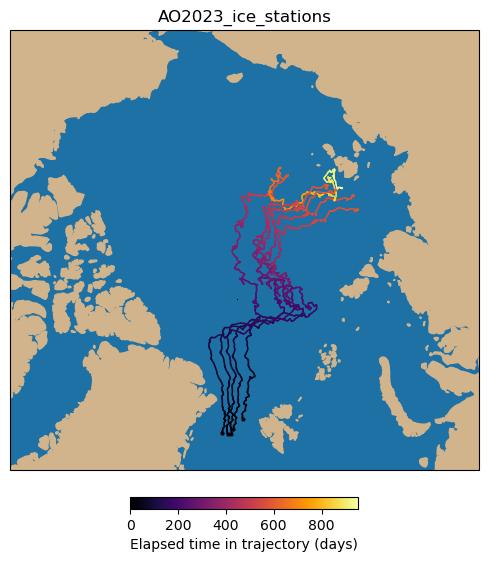

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2023_ice_stations_1d_20230606_ts.png


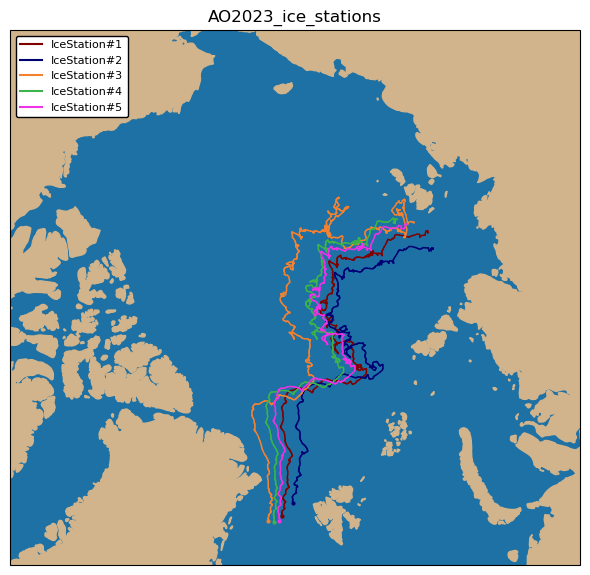

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2023_ice_stations_1d_20230606_id.png


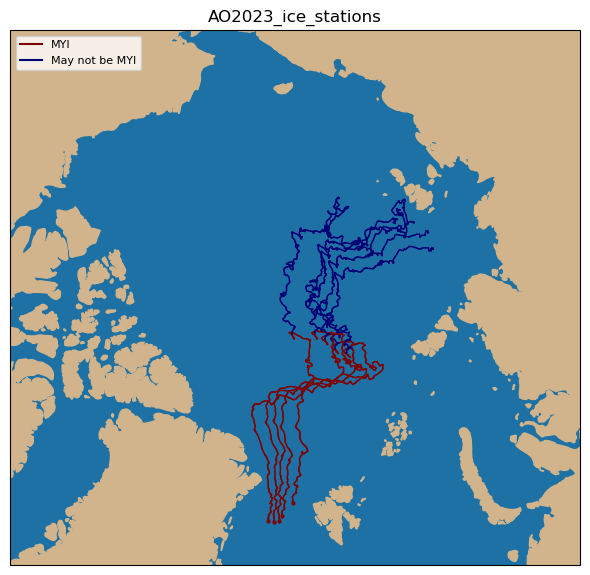

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2023_ice_stations_1d_20230606_myi.png


In [8]:
# 2023 Ice Stations
plot_traj(bt_2023st, region='ease-nh', colmode='timestep', output=outdir)
plot_traj(bt_2023st, region='ease-nh', colmode='id', output=outdir)
plot_traj(bt_2023st, region='ease-nh', colmode='myi', output=outdir)


## Moorings

### Trajectories

In [9]:
bt_2022mo = backtrack_loc(json_file=json_file, json_data=json_data_2022mo, period=period, outname=outdir,
              force=True, verbose=True)

Amundsen-1: Running backtracking in 2-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Polar_Stereographic_Grid (found in dt0)
Got NetCDF: Attribute not found
Tracking... 29%
GAP WARNING: No ice conc data available for 20210220, using data fo 20210219 instead (skip 1 days)
Tracking... 57%
Output file ready in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807.nc



### Plotting

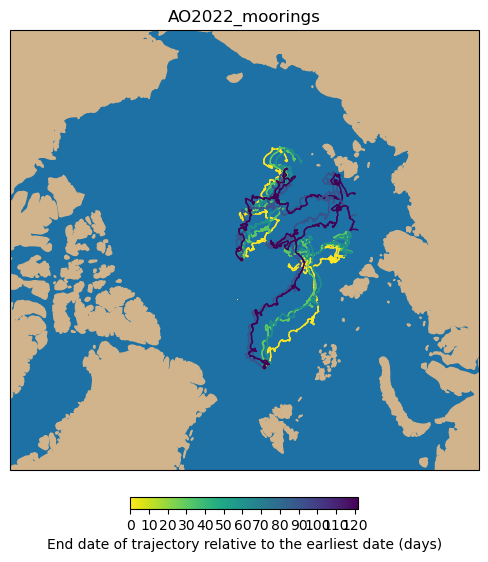

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807_ed.png


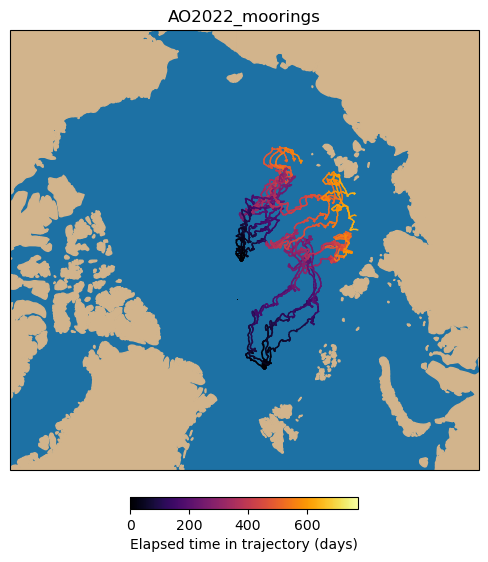

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807_ts.png


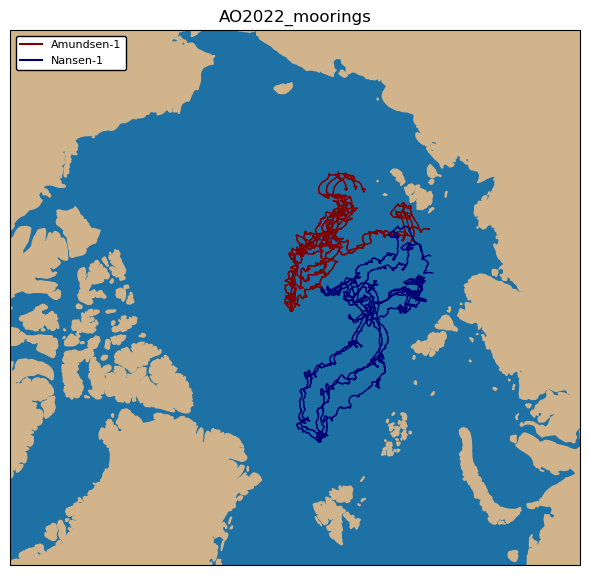

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807_id.png


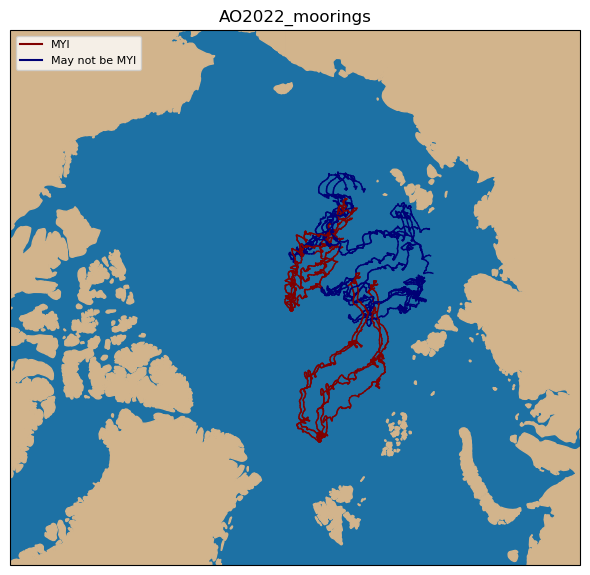

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/backtrack_loc_AO2022_moorings_2d_20210807-20220807_myi.png


In [10]:
# Plotting with a 1-month stride (takes a long time to plot every day!)
plot_traj(bt_2022mo, region='ease-nh', colmode='enddate', output=outdir, stride='1m')
plot_traj(bt_2022mo, region='ease-nh', colmode='timestep', output=outdir, stride='1m')
plot_traj(bt_2022mo, region='ease-nh', colmode='id', output=outdir, stride='1m')
plot_traj(bt_2022mo, region='ease-nh', colmode='myi', output=outdir, stride='1m')


# Forward tracking

## Ice Stations

### Trajectories

In [11]:
# 2022
ft_2022st = backtrack_loc(json_file=json_file, json_data=json_data_2022st, period=period, outname=outdir,
              forwardtrack=True, force=True, verbose=True)

#1 (North Pole): Running backtracking in 1-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/forwardtrack_loc_AO2022_ice_stations_1d_20220729.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Polar_Stereographic_Grid (found in dt0)
Got NetCDF: Attribute not found
Tracking... 5%
GAP WARNING: No ice conc data available for 20221109, using data fo 20221108 instead (skip 1 days)
Tracking... 27%
Output file ready in /home/emilyjd/software/backtrack_locs/notebook/output/forwardtrack_loc_AO2022_ice_stations_1d_20220729.nc



### Plotting

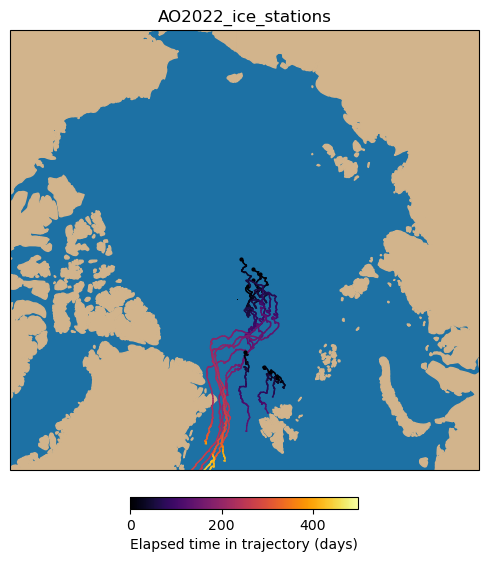

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/forwardtrack_loc_AO2022_ice_stations_1d_20220729_ts.png


In [12]:
# 2022 Ice Stations
plot_traj(ft_2022st, region='ease-nh', colmode='timestep', output=outdir)